## Assignment 05
Varun Tandon

vt9438

In this notebook, I prepare the MNIST data for a neural network model.

The first model has three dense layers with different activation functions. However it does not yield the desired results on the test set.

The second model is a simple CNN, as Conv2D layers work better with images. it has conv2d, max_pooling2d_4, flatten_4, dense_20, dropout_4, dense_21 layers. This model gives us a much better accuracy that we can use.


*The steps 9, 10 are out of order as I perform them when I create the first model.*

Step 0

In [192]:
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import math
from tensorflow.keras import backend as K

%matplotlib inline


Step 1

In [193]:
from keras.datasets import mnist
data = mnist.load_data()

Step 2, 3

In [194]:
(X_train, y_train), (X_test, y_test) = data

In [195]:
X_train.shape

(60000, 28, 28)

In [196]:
X_train[0].shape

(28, 28)

This shows us that the dataset contains 60,000 images each of size 28*28. Now let us see what an image looks like.

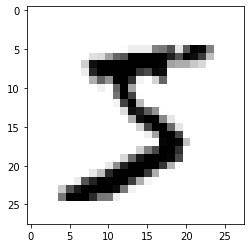

In [197]:
testImage = X_train[0]
fig = plt.figure
plt.imshow(testImage, cmap='gray_r')
plt.show()

<function matplotlib.pyplot.show>

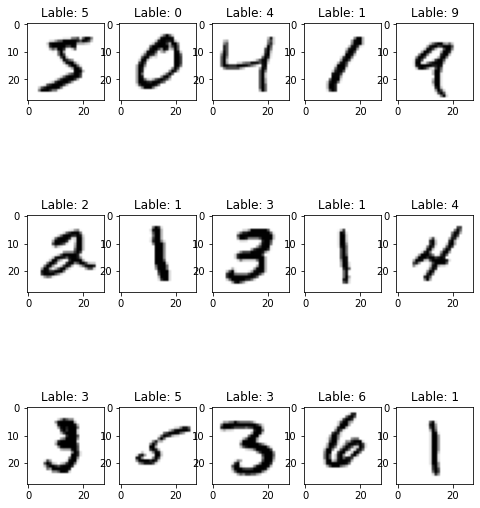

In [198]:
testImages = X_train[:15]
labels = y_train[:15]
rows = 3
col = 5
fig, axes = plt.subplots(rows, col, figsize =(8,10))

for i in range(15):
  ax = axes[i//col, i%col]
  ax.imshow(testImages[i], cmap='gray_r')
  ax.set_title('Lable: {}'.format(labels[i]))
plt.show

Here, we need to prepare the data for the first model. The first dense layer expects an object of size 28*28. With respect to the target value, we don't want the model to get confused with the labels "1-10" with the values 1-10. 

In [199]:
# train set / data 
X_train = X_train.reshape(-1, 28*28)
X_train = X_train.astype('float32') / 255

# train set / target 
y_train = tf.keras.utils.to_categorical(y_train , num_classes=10)

In [200]:
print(X_train.shape)
print(y_train.shape)

(60000, 784)
(60000, 10)


Splitting the data into training and validation:

In [201]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [202]:
print(X_train.shape)
print(y_train.shape)

(48000, 784)
(48000, 10)


Step 4, 5

In [203]:
epoch = 100
lr = 0.01
sgd = SGD(lr)

The first model:

In [204]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(32, input_dim = 28 * 28, activation= 'sigmoid'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_23 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_24 (Dense)             (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


Using ExponentialDecay():

In [205]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    0.1,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=False)

printlr and updatelr will be used as callbacks to monitor the lr during the running of the models.

In [206]:
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = K.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print('\n', "Epoch:", Epoch_count, ', LR: {:.2f}'.format(lr))

printlr = printlearningrate() 

In [207]:
updatelr = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

We will compare three kinds of losses: Categorical Crossentropy, Binary Crossentropy and Mean Squared Error Losses.

In [208]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=sgd,
              metrics=['accuracy'])

Step 10

In [209]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

Step 9

In [210]:
earlyStoppingCallback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50)

In [211]:
callback_list = [model_checkpoint_callback, earlyStoppingCallback, printlr, updatelr]

Model with Categorical Crossentropy Loss:

In [212]:
training_history_categorical_crossentropy = model.fit(
    X_train,
    y_train,
    epochs=epoch,
    verbose=1,
    validation_data=(X_val, y_val),
    callbacks=callback_list
)

Epoch 1/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5445 - accuracy: 0.8476 - val_loss: 0.2856 - val_accuracy: 0.9178

 Epoch: 1 , LR: 0.10
Epoch 2/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2583 - accuracy: 0.9239 - val_loss: 0.2298 - val_accuracy: 0.9348

 Epoch: 2 , LR: 0.10
Epoch 3/100
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1995 - accuracy: 0.9423 - val_loss: 0.1865 - val_accuracy: 0.9467

 Epoch: 3 , LR: 0.10
Epoch 4/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1676 - accuracy: 0.9505 - val_loss: 0.1766 - val_accuracy: 0.9498

 Epoch: 4 , LR: 0.10
Epoch 5/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1455 - accuracy: 0.9575 - val_loss: 0.1529 - val_accuracy: 0.9549

 Epoch: 5 , LR: 0.10
Epoch 6/100
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1291 - accuracy: 0.9616 - val_loss: 0.1454 - val_accuracy: 0.9553

 Epoch: 6 , LR: 0.1

Step 6

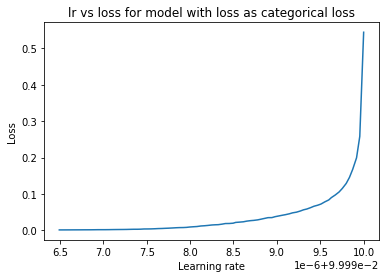

In [213]:
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title('lr vs loss for model with loss as categorical loss')
plt.plot(training_history_categorical_crossentropy.history['lr'], training_history_categorical_crossentropy.history['loss'])

Step 7:

When the learning rate increases, the loss increases. This is because the model converges too quickly to a suboptimal solution. Hence by exponentially decreasing the learning rate using ExponentialDecay(), we can control the loss.

In [214]:
print("model accuracy for loss as categorical loss: ", np.mean(training_history_categorical_crossentropy.history['accuracy']))

model accuracy for loss as categorical loss:  0.9888797916215042


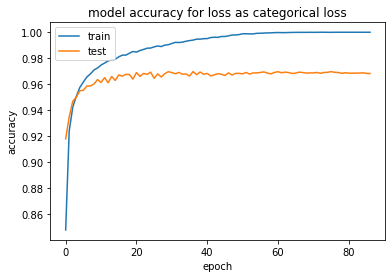

In [215]:
plt.plot(training_history_categorical_crossentropy.history['accuracy'])
plt.plot(training_history_categorical_crossentropy.history['val_accuracy'])
plt.title('model accuracy for loss as categorical loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [216]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=sgd,
              metrics=['accuracy'])

Model with Binary Crossentropy Loss:

In [217]:
training_history_binary_crossentropy = model.fit(
    X_train,
    y_train,
    epochs=epoch,
    verbose=1,
    validation_data=(X_val, y_val),
    callbacks=callback_list
)

Epoch 1/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0548 - accuracy: 0.9894 - val_loss: 0.0412 - val_accuracy: 0.9655

 Epoch: 1 , LR: 0.10
Epoch 2/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0186 - accuracy: 0.9947 - val_loss: 0.0380 - val_accuracy: 0.9668

 Epoch: 2 , LR: 0.10
Epoch 3/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0161 - accuracy: 0.9950 - val_loss: 0.0362 - val_accuracy: 0.9664

 Epoch: 3 , LR: 0.10
Epoch 4/100
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0146 - accuracy: 0.9952 - val_loss: 0.0350 - val_accuracy: 0.9672

 Epoch: 4 , LR: 0.10
Epoch 5/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0135 - accuracy: 0.9955 - val_loss: 0.0339 - val_accuracy: 0.9676

 Epoch: 5 , LR: 0.10
Epoch 6/100
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0127 - accuracy: 0.9955 - val_loss: 0.0333 - val_accuracy: 0.9684

 Epoch: 6 , LR: 0.1

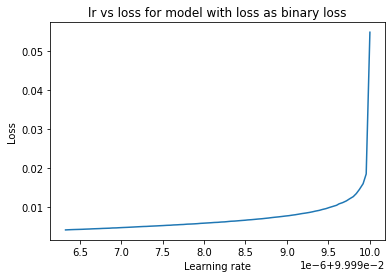

In [218]:
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title('lr vs loss for model with loss as binary loss')
plt.plot(training_history_binary_crossentropy.history['lr'], training_history_binary_crossentropy.history['loss'])

In [219]:
print("model accuracy for loss as binary loss: ", np.mean(training_history_binary_crossentropy.history['accuracy']))

model accuracy for loss as binary loss:  0.9971325554690518


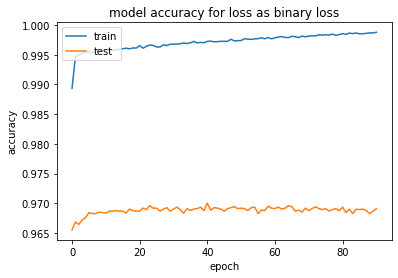

In [220]:
plt.plot(training_history_binary_crossentropy.history['accuracy'])
plt.plot(training_history_binary_crossentropy.history['val_accuracy'])
plt.title('model accuracy for loss as binary loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [221]:
model.compile(loss=keras.losses.mean_squared_error,
              optimizer=sgd,
              metrics=['accuracy'])

Model with Mean Squared Error Loss:

In [222]:
training_history_mean_squared = model.fit(
    X_train,
    y_train,
    epochs=100,
    verbose=1,
    validation_data=(X_val, y_val),
    callbacks=callback_list
)

Epoch 1/100
1500/1500 [==============================] - 3s 2ms/step - loss: 1.9595e-04 - accuracy: 0.9990 - val_loss: 0.0053 - val_accuracy: 0.9683

 Epoch: 1 , LR: 0.10
Epoch 2/100
1500/1500 [==============================] - 3s 2ms/step - loss: 1.6410e-04 - accuracy: 0.9991 - val_loss: 0.0052 - val_accuracy: 0.9688

 Epoch: 2 , LR: 0.10
Epoch 3/100
1500/1500 [==============================] - 2s 2ms/step - loss: 1.4662e-04 - accuracy: 0.9993 - val_loss: 0.0053 - val_accuracy: 0.9684

 Epoch: 3 , LR: 0.10
Epoch 4/100
1500/1500 [==============================] - 3s 2ms/step - loss: 1.2983e-04 - accuracy: 0.9994 - val_loss: 0.0053 - val_accuracy: 0.9684

 Epoch: 4 , LR: 0.10
Epoch 5/100
1500/1500 [==============================] - 2s 2ms/step - loss: 1.1878e-04 - accuracy: 0.9995 - val_loss: 0.0053 - val_accuracy: 0.9687

 Epoch: 5 , LR: 0.10
Epoch 6/100
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0982e-04 - accuracy: 0.9995 - val_loss: 0.0053 - val_accuracy: 0.9

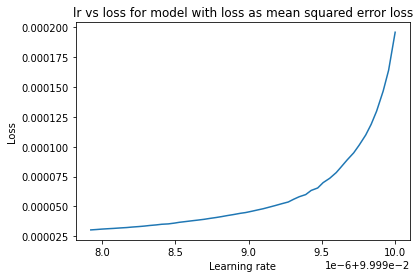

In [223]:
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title('lr vs loss for model with loss as mean squared error loss')
plt.plot(training_history_mean_squared.history['lr'], training_history_mean_squared.history['loss'])

In [224]:
print("model accuracy for loss as mean squared error loss: ", np.mean(training_history_mean_squared.history['accuracy']))

model accuracy for loss as mean squared error loss:  0.9998253136873245


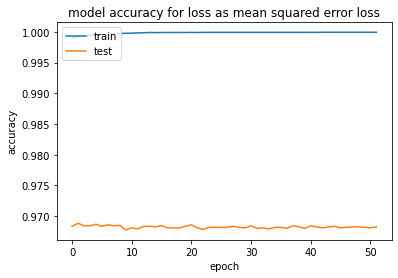

In [225]:
plt.plot(training_history_mean_squared.history['accuracy'])
plt.plot(training_history_mean_squared.history['val_accuracy'])
plt.title('model accuracy for loss as mean squared error loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [226]:
# test set / data 
X_test = X_test.reshape(-1, 28*28)
X_test = X_test.astype('float32') / 255

# test set / target 
y_test = tf.keras.utils.to_categorical(y_test , num_classes=10)

Step 8

Let us compare all the losses. We see that the Categorical loss started much higher than the other two, but all losses plateau close to 0 as the epoch number reaches its end.

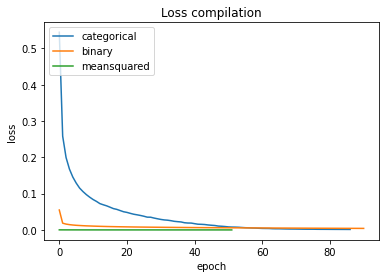

In [227]:
plt.plot(training_history_categorical_crossentropy.history['loss'])
plt.plot(training_history_binary_crossentropy.history['loss'])
plt.plot(training_history_mean_squared.history['loss'])
plt.title('Loss compilation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['categorical', 'binary', 'meansquared'], loc='upper left')
plt.show()

Let us take the model with Binary Crossentropy and evaluate it with the test data.

In [228]:
training_history_binary_crossentropy_test = model.evaluate(X_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0052 - accuracy: 0.9696


Here we see that we get 96.66% accuracy. This can be improved.


Let us reshape X_train and X_test for our CNN. The Conv2D layer expects a shape of (28x28x1). 

In [229]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [230]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

Let us create the second model, i.e. the CNN

In [231]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               605824    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
_______________________________________________

Let us take Categorical Crossentropy Loss as this model's loss.

In [232]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=sgd,
              metrics=['accuracy'])

In [233]:
training_history_categorical_crossentropy_newModel = model.fit(
    X_train,
    y_train,
    epochs=10,
    verbose=1,
    validation_data=(X_val, y_val),
    callbacks=callback_list
)

Epoch 1/10
1200/1200 [==============================] - 20s 16ms/step - loss: 0.2987 - accuracy: 0.9087 - val_loss: 0.1307 - val_accuracy: 0.9618

 Epoch: 1 , LR: 0.10
Epoch 2/10
1200/1200 [==============================] - 19s 16ms/step - loss: 0.1301 - accuracy: 0.9603 - val_loss: 0.0885 - val_accuracy: 0.9745

 Epoch: 2 , LR: 0.10
Epoch 3/10
1200/1200 [==============================] - 19s 16ms/step - loss: 0.0910 - accuracy: 0.9719 - val_loss: 0.0747 - val_accuracy: 0.9784

 Epoch: 3 , LR: 0.10
Epoch 4/10
1200/1200 [==============================] - 19s 16ms/step - loss: 0.0691 - accuracy: 0.9790 - val_loss: 0.0670 - val_accuracy: 0.9807

 Epoch: 4 , LR: 0.10
Epoch 5/10
1200/1200 [==============================] - 19s 16ms/step - loss: 0.0559 - accuracy: 0.9820 - val_loss: 0.0645 - val_accuracy: 0.9802

 Epoch: 5 , LR: 0.10
Epoch 6/10
1200/1200 [==============================] - 19s 16ms/step - loss: 0.0461 - accuracy: 0.9861 - val_loss: 0.0685 - val_accuracy: 0.9800

 Epoch: 6 , L

In [234]:
print("model accuracy for the CNN: ", np.mean(training_history_categorical_crossentropy_newModel.history['accuracy']))

model accuracy for the CNN:  0.9746614515781402


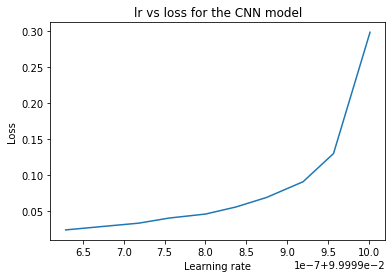

In [235]:
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title('lr vs loss for the CNN model')
plt.plot(training_history_categorical_crossentropy_newModel.history['lr'], training_history_categorical_crossentropy_newModel.history['loss'])

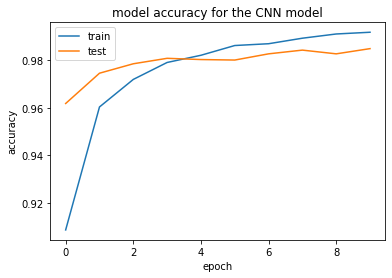

In [236]:
plt.plot(training_history_categorical_crossentropy_newModel.history['accuracy'])
plt.plot(training_history_categorical_crossentropy_newModel.history['val_accuracy'])
plt.title('model accuracy for the CNN model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Even with 10 epochs we can see that the CNN has a better result than the first model. Let us evaluate it with the test data.

In [237]:
training_history_categorical_crossentropy_newModel_test = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0623 - accuracy: 0.9828


Step 11

The accuracy of the model on the test data is above 98%. 